# Przeprowadzone testy

In [1]:
import pandas as pd
from data_structures import Item, Warehouse, Company, Solution
from simulated_annealing import TemperatureFunction, IterationsFunction, SimulatedAnnealing
from visualization_tools import fill_warehouse, print_selected_items, plot_algorithm, plot_temperature_and_iterations 

In [2]:
# DANE DLA MAŁEGO PRZYPADKU
small_company = Company(4, 10000, 0.1)
small_warehouse = Warehouse()
fill_warehouse(small_warehouse, 'data/Items-SmallList.csv')

# DANE DLA PRZYPADKU ŚREDNIEJ WIELKOŚCI
medium_company = Company(10, 50000, 0.1)
medium_warehouse = Warehouse()
fill_warehouse(medium_warehouse, 'data/Items-MediumList.csv')

# DANE DLA DUŻEGO PRZYPADKU
big_company = Company(50, 100000, 0.1)
big_warehouse = Warehouse()
fill_warehouse(big_warehouse, 'data/Items-BigList.csv')

# Dla jakich parametrów będziemy testować algorytm?

* wybór rozwiązania początkowego
* wybór rozwiązania sąsiadującego
* współczynnika ilości wyrzuconych  do wszystkich wybranych części 
* zmiennego spadku temperatury
* ilości iteracji w poszczególnych epokach

__Wszystkie testy będą prowadzone dla przypadków o__:
* małym rozmiarze   (wybór 4 z 10 rodzajów części)
* średnim rozmiarze (wybór 10 z 100 rodzajów części)
* dużym rozmiarze   (wybór 50 z 1000 rodzajów części)

# Zacznijmy od analizy rozwiązania początkowego:
__Wersje rozwiązania:__
* __random__ - wybranie rodzaju i liczby części w sposób losowy
* __greatest__ - wybranie rodzaju części z najwyższymi marżami oraz ilości, którą da się kupić za 1/K-tą budżetu
* __uncommon__ - wybranie rodzaju części najrzadziej występujących na rynku oraz ilości, którą da się kupić za 1/K-tą budżetu

## Działanie metody dla małego przypadku

In [3]:
avg_for_small_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_small_case += s1.profit
    
s2 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_small_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      1289.41
WERSJA Z MARŻAMI:   1577.91
WERSJA NAJRZADSZE:  1002.64


## Działanie metody dla średniego przypadku

In [4]:
avg_for_medium_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_medium_case += s1.profit
    
s2 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_medium_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      7822.67
WERSJA Z MARŻAMI:   16368.13
WERSJA NAJRZADSZE:  13059.05


## Działanie metody dla dużego przypadku

In [5]:
# avg_for_big_case = 0

# for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
#     s1 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='random')
#     avg_for_big_case += s1.profit
    
# s2 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='greatest')
# s3 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
# print('WERSJA LOSOWA:     ', f'{avg_for_big_case/1000:.2f}')
# print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
# print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

# Analiza różnych definicji sąsiedztwa:
__Wersje rozwiązania sąsiadującego:__
* __random__ - wyrzucenie i dobór nowych części oraz ich ilości w sposób losowy
* __margin__ - wyrzucenie i dobór nowych części na podstawie najlepszych marży (ilość dobierana w sposób losowy)
* __profit__ - wyrzucenie i dobór nowych części na podstawie największego zysku (ilość dobierana w sposób losowy)

__UWAGA!__ Ponieważ każda z wersji zawiera element losowy testy przeprowadzamy wielokrotnie i wyciągamy z nich średnią

# Algorytm będziemy testować dla poniższych funkcji temperatury i iteracji

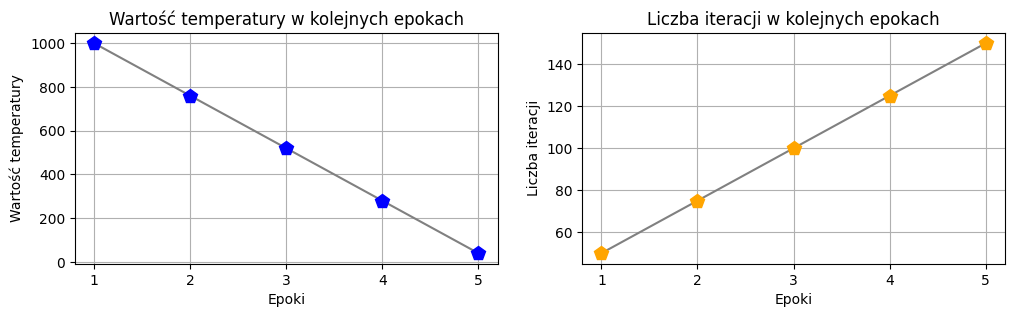

In [11]:
temps1 = TemperatureFunction(1000, 240, 5, version='arithmetic')
iters1 = IterationsFunction(50, 150, 5, version='linear')

plot_temperature_and_iterations(temps1, iters1)

## Działanie metody dla małego przypadku

In [ ]:
temps = TemperatureFunction(1000, 0.5, 5, version='geometric')
iters = IterationsFunction(50, 200, 5, version='square')
# temps = [1000, 900, 800, 700, 600]
# iters = [1, 1, 1, 1, 1]

result, best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(company, warehouse.stored_items, temps, iters, init_version='uncommon')

plot_temperature_and_iterations(temps, iters)
plot_algorithm(way_of_algorithm, best_result, iters)
print(best_result)
print_selected_items(chosen_items)

## Działanie metody dla średniego przypadku

## Działanie metody dla dużego przypadku

In [ ]:
## zacznij od testowania rozwiazania początkowego za pomocą klasy solution
# opisz parametryzację
# potem dobierz sąsiedztwo
# potem drop coeff itd

In [ ]:
temps1 = TemperatureFunction(1000, 0.5, 5, version='geometric')
iters1 = IterationsFunction(50, 200, 5, version='square')

plot_temperature_and_iterations(temps1, iters1)

In [ ]:
warehouse = Warehouse()

fill_warehouse(warehouse, 'data/Items-MediumList.csv')

company = Company(10, 50000, 0.1)

temps = TemperatureFunction(1000, 0.5, 5, version='geometric')
iters = IterationsFunction(50, 200, 5, version='square')
# temps = [1000, 900, 800, 700, 600]
# iters = [1, 1, 1, 1, 1]

result, best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(company, warehouse.stored_items, temps, iters, init_version='uncommon')

plot_temperature_and_iterations(temps, iters)
plot_algorithm(way_of_algorithm, best_result, iters)
print(best_result)
print_selected_items(chosen_items)

## Różne podejścia